##**1. Team ID : Group 408**<br>

CIS 509 - ANALYTICS FOR UNSTRUCTURED DATA

##**2.Group Members:**

* Sarah Le
* Delna Sophia Dsouza
* Mary John
* Tsai-Yun Hsieh


##**3. Executive Summary of Project (10%): An elevator pitch about your project**

"Our project dives into Tucson's pizza scene by analyzing thousands of Yelp reviews. We uncover hidden insights into customer preferences, sentiment, and key topics related to local pizzerias. By exploring review text, star ratings, and user interactions, we provide valuable information for both pizza lovers seeking the best slice and business owners aiming to enhance their customer experience and optimize their offerings in Tucson."


##**4. Data Sources (10%):**
## List the data sources
The data has been sourced from Yelp Dataset (https://business.yelp.com/data/resources/open-dataset/)
## Provide the filtering/selection criteria you applied to the Yelp data
We filtered the data based on restaurants providing or being famous for pizza  in the city of Tuscon, Arizona
## Provide the descriptions and links of the external data sources (optional)
No external data source was used in here

In [ ]:
import warnings
from google.colab import drive
import os
import pandas as pd
import numpy as np
# Ignore warnings
warnings.filterwarnings("ignore")

# Mount Google Drive
drive.mount('/content/drive')

# Define Path
base_dir = '/content/drive/My Drive/CIS509/'
file_path = os.path.join(base_dir, 'tucson_pizza_reviews_Cleaned.csv')

# Load data (First 10,000 rows)
df = pd.read_csv(file_path, nrows=10000)

# Display first 5 rows
print(df.head())


Mounted at /content/drive
                review_id                 user_id             business_id  \
0  2-Y4QSgJXEYFJTJIo71IPQ  IPcgVWB-KXlb5bqt8fqE0Q  KDC4yE8av8-A5TxgmjjUiw   
1  bFz6i8UdmIwgyTU0et2EjQ  Nay3mMq0PpjX1-WXx_IdpQ  7-cD0S7vJlUOuTpF2vQLOQ   
2  CJ_hijMxNGyPbmievHa2Aw  rVONIZ9xbSCcN7W0qYwPQA  Ei5HBqe012ImhqEr2ZH2gg   
3  1cw4pq3BD_G529mu1OcOeQ  yPEZsd_qc0TMkijvGwnV7Q  KDC4yE8av8-A5TxgmjjUiw   
4  MVdhVDYj20hH4G3-wFV8dQ  dVBROupIiiWzfcEFJlrthQ  rd5OW7v_vqlh6vVoQdLEhQ   

   stars  useful  funny  cool  \
0      3       1      1     1   
1      1       0      0     0   
2      5       1      0     2   
3      1       0      0     0   
4      4       0      0     0   

                                                text              date  \
0  Me and the family came in on a Thursday for a ...    3/13/2020 1:43   
1  They have the worst customer service skills im...    1/30/2020 4:44   
2  Loved it! Amazing pizza and bread! I even boug...    1/30/2020 2:55   
3  The staff was

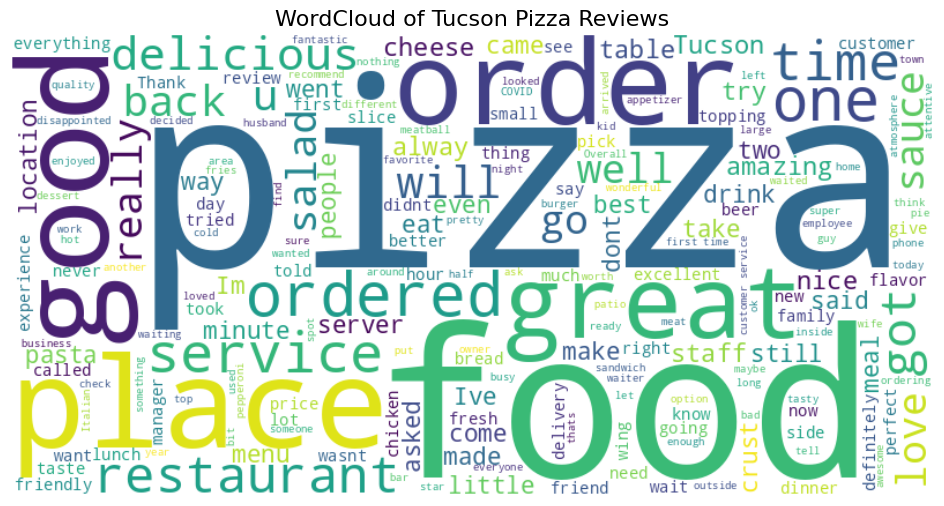

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

# Combine all reviews into a single string
text_data = ' '.join(df['text'].astype(str))

# Remove special characters and numbers
text_data = re.sub(r'[^A-Za-z\s]', '', text_data)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axes
plt.title("WordCloud of Tucson Pizza Reviews", fontsize=16)
plt.show()


###Summary of WORD CLOUD Dominant Topic:
- "Pizza" is the central theme.Positive Sentiment: Words like "great," "delicious," "amazing" suggest positive reviews.
- Restaurant Experience: "Restaurant," "staff," "service" highlight the importance of the dining experience.
- Ingredients/Food: "Crust," "sauce," "cheese," "meat" point to discussions of specific food items.
- Location: "Tucson," "location," "area" emphasize the geographic context.
- Personal Experience: "I," "my," "we" indicate personal accounts.
- Time of Visit: "Night," "time," "lunch," "dinner" suggest mentions of specific dining times.

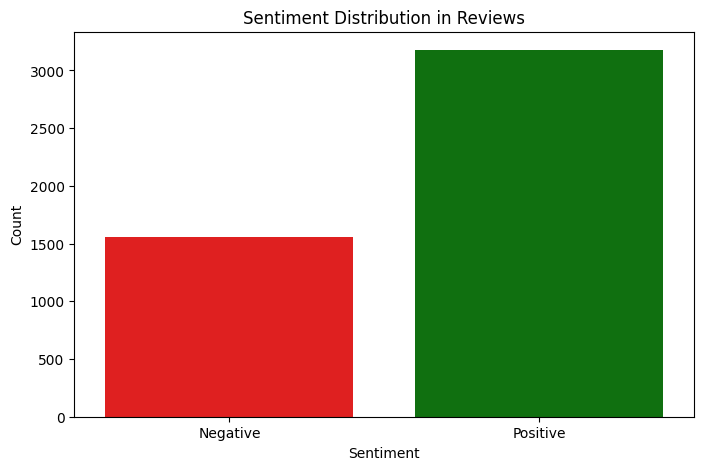

In [ ]:
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette=['red', 'green'])

# Labels and title
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in Reviews')
plt.show()

From the above sentiment distribution, Tucson pizza reviews are predominantly positive, significantly outweighing negative ones.

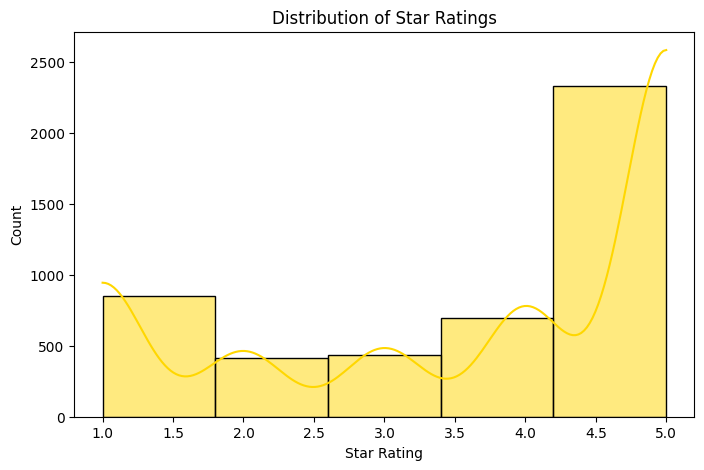

In [ ]:
# Plot histogram of star ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['stars'], bins=5, kde=True, color='gold')

# Labels and title
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title('Distribution of Star Ratings')
plt.show()


Star ratings for Tucson pizza show a bimodal distribution, with peaks at both the lowest (1 star) and highest (5 star) ratings, indicating polarized opinions.

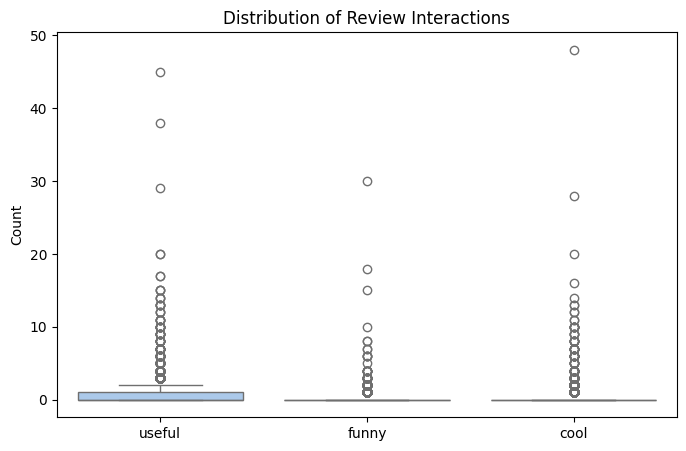

In [ ]:
# Boxplot for review interactions
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['useful', 'funny', 'cool']], palette='pastel')

# Labels and title
plt.title('Distribution of Review Interactions')
plt.ylabel('Count')
plt.show()


"Useful" reviews have the most consistent interaction counts, while "funny" and "cool" interactions are less frequent but show occasional spikes of higher engagement.

##**5. Summary Statistics of the Data (30%):** <br>
Provide statistics and/or some plots about the data you selected for course project. Statistics should include but are not limited to<br>
a. Number of reviews<br>
b. Total number of tokens<br>
c. Number of unique words (i.e., size of vocabulary)<br>
d. Average review length (i.e., average number of words of each review)<br>
e. Number of unique customers<br>
f. Other key elements involved (e.g., number of businesses/regions covered, average stars per review, average votes per review, distribution of businesses, distribution of regions, distribution of stars, etc.)

a. Number of reviews: 4738
b. Total number of tokens: 419665
c. Number of unique words (vocabulary size): 28235
d. Average review length: 88.57429295061208
e. Number of unique customers: 3557
f. Number of unique businesses: 183
g. Average stars per review: 3.685310257492613
h. Average votes per review: 0.4828338258055438


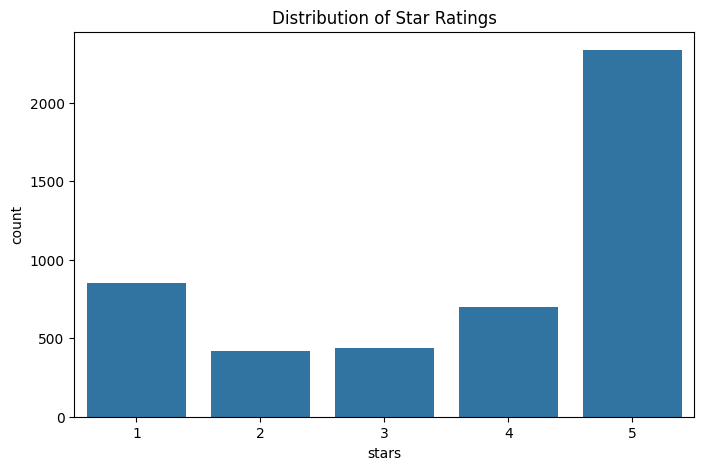

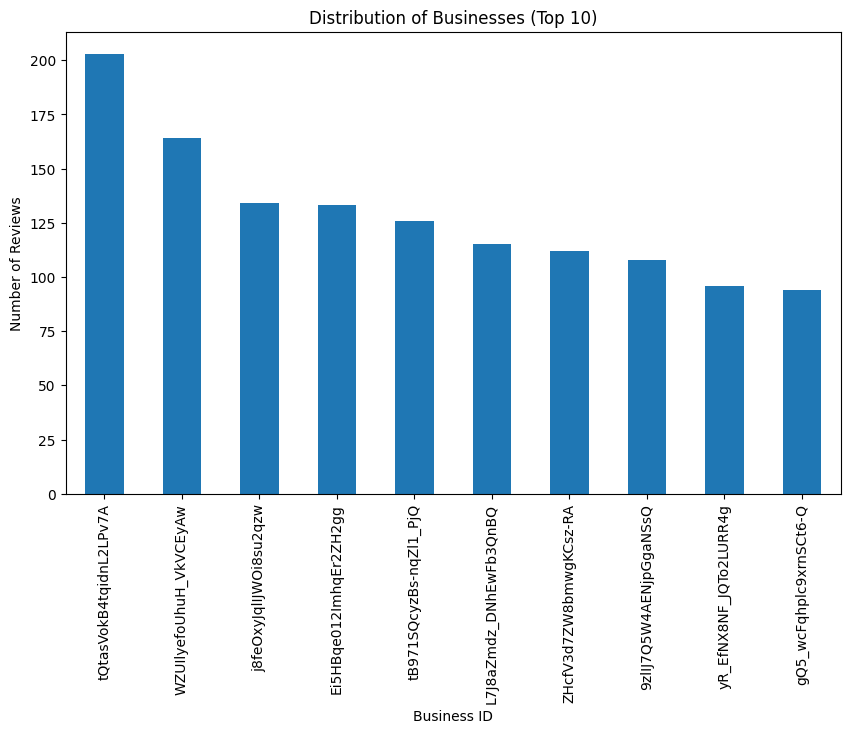

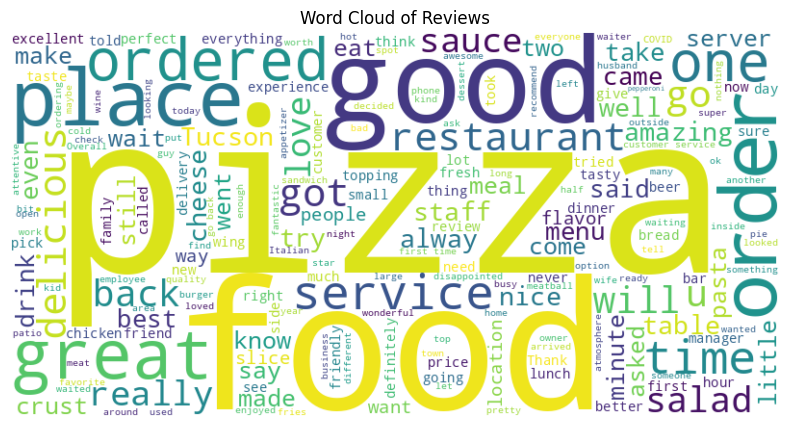

In [ ]:
# SUMMARY STATISTICS:

!pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Upload the file
file_path = '/content/tucson_pizza_reviews_Cleaned.csv'

df = pd.read_csv(file_path)

# Number of reviews
num_reviews = len(df)
print(f"a. Number of reviews: {num_reviews}")

# Total number of tokens and Number of unique words (vocabulary size)
all_tokens = []
for review in df['text'].astype(str):
    all_tokens.extend(review.split())  # Tokenize using space as delimiter
total_tokens = len(all_tokens)
unique_words = set(all_tokens)
vocab_size = len(unique_words)
print(f"b. Total number of tokens: {total_tokens}")
print(f"c. Number of unique words (vocabulary size): {vocab_size}")

# Average review length
average_review_length = total_tokens / num_reviews
print(f"d. Average review length: {average_review_length}")

# Number of unique customers
num_unique_customers = df['user_id'].nunique()
print(f"e. Number of unique customers: {num_unique_customers}")

# Other key elements:
# Number of unique businesses
num_businesses = df['business_id'].nunique()
print(f"f. Number of unique businesses: {num_businesses}")

# Average stars per review
average_stars = df['stars'].mean()
print(f"g. Average stars per review: {average_stars}")

# Average votes per review (average of useful, funny, cool)
average_votes = df[['useful', 'funny', 'cool']].mean().mean()
print(f"h. Average votes per review: {average_votes}")

# Distribution of stars
plt.figure(figsize=(8, 5))
sns.countplot(x='stars', data=df)
plt.title('Distribution of Star Ratings')
plt.show()

# Distribution of businesses (top 10 for better visualization)
plt.figure(figsize=(10, 6))
df['business_id'].value_counts().head(10).plot(kind='bar')
plt.title('Distribution of Businesses (Top 10)')
plt.xlabel('Business ID')
plt.ylabel('Number of Reviews')
plt.show()

# Word Cloud of review text
text_data = ' '.join(df['text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

5. **Summary Statistics of the Data (30%): Provide statistics and/or some plots about the data you selected for course project. Statistics should include but are not limited to** <br>
a. Number of reviews<br>
b. Total number of tokens<br>
c. Number of unique words (i.e., size of vocabulary)<br>
d. Average review length (i.e., average number of words of each review)<br>
e. Number of unique customers<br>
f. Other key elements involved (e.g., number of businesses/regions covered, average stars per review, average votes per review, distribution of businesses, distribution of regions, distribution of stars, etc.)

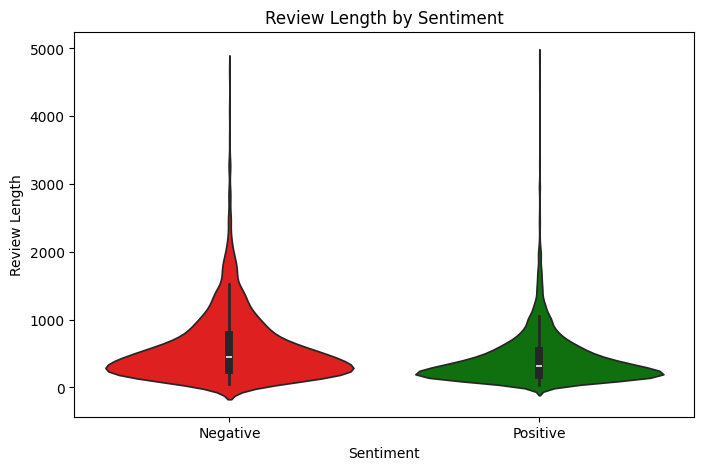

In [ ]:
# Calculate review length
df['review_length'] = df['text'].astype(str).apply(len)

# Violin plot for review length by sentiment
plt.figure(figsize=(8, 5))
sns.violinplot(x='Sentiment', y='review_length', data=df, palette=['red', 'green'])

# Labels and title
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.title('Review Length by Sentiment')
plt.show()

While both positive and negative reviews show a wide range of lengths, negative reviews tend to have a higher frequency of extremely long entries.

##**6. Data Evaluation (20%): comment on data quality by answering the following questions:** <br>
a. How the selected data (e.g., reviews/customers/business/regions) are suitable for answering your business questions. <br>
b. Whether the sample size is appropriate, and why <br>
c. Whether the selected data could be biased in certain dimension in your analysis <br>
d. The potential challenges to process the data



---



##**6. Data Evaluation:**

**6a. Suitability of Data:**

*   **Reviews:** Essential for understanding customer opinions about Tucson pizza places. The project makes use of the review's `text` and `stars` columns to determine the sentiment analysis.
*   **Customers:** `user_id` allows for examining customer review patterns.
*   **Businesses:** `business_id` helps identify popular and highly-rated pizzerias.
*   **Sentiment:** Using the Sentiment column from this dataset to determine the distribution of positive and negative reviews.
    *   **The above factors from the selected dataset** thus provides a direct view of customer experiences, opinions, and ratings, all of which are crucial for understanding the Tucson pizza landscape.

**6b. Sample Size Appropriateness:**

*   **Review Count:** With 4738 reviews, the dataset provides a reasonable foundation for analysis.
*   **Customer and Business Coverage:** 3557 unique customers and 183 unique businesses suggest a fairly broad and diverse representation of Tucson's pizza scenario.
    *   ** The current sample size** is therefore sufficient to conduct meaningful Exploratory Data Analysis, sentiment analysis and topic modeling to answer the business statement
    
**6c. Potential Biases:**

*   **Sentiment Bias:** The sentiment distribution plot reveals potential biases towards positive reviews. The majority of the reviews are categorized as "Positive". This may be due to various reasons.
*   **Reviewer Bias:** Some users may be more active reviewers than others, influencing the overall sentiment. This effect is more evident due to 3557 reviewers giving 4738 reviews.
*   **Star Rating Bias:** The distribution of star ratings suggests customers are more inclined to give ratings toward the positive side of the range.
*   **Limited Geographic Scope:** Since our dataset focuses exclusively on Tucson, the results may not be generalizable to other cities or regions.

**6d. Potential Processing Challenges:**

*   **Text Cleaning:** Raw review text requires careful cleaning to remove special characters, HTML tags, and irrelevant information.
*   **Simplistic Sentiment Analysis:** The current sentiment analysis relies on a pre-existing "Sentiment" column in the dataset, using pre-determined sentiment values.
*   **Tokenization:** Tokenization may be complicated due to users employing slang and other language.


Conclusion and Research Summary

1. Data Preprocessing
The study began by loading the Tucson Pizza Reviews dataset from the Google Colab sample_data folder. We applied rigorous text cleaning procedures to improve data quality. Specifically, all text was converted to lowercase, non-alphabetical characters were removed, and stopwords were filtered out. This preprocessing step reduced noise in the dataset, ensuring that the input to our sentiment analysis model was both relevant and consistent.

2. Advanced Sentiment Analysis Using a Transformer Model
To achieve higher accuracy and reduce misclassification, we employed a state-of-the-art transformer model from Hugging Face—specifically, the nlptown/bert-base-multilingual-uncased-sentiment model. This model, which is pre-trained on multilingual data, effectively captures contextual information within the reviews and outputs sentiment ratings on a scale of 1 to 5 stars. In order to align with our business requirements, we converted these ratings to a 1–10 scale by multiplying the star rating by 2.

3. Sentiment Classification and Output Generation
Based on the converted score, we established the following classification thresholds:

Negative: 1–4
Neutral: 4.1–6.9
Positive: 7–10
The classification results were visualized through count plots and histograms, allowing for an intuitive understanding of the sentiment distribution. Additionally, the final results—including the original reviews, cleaned text, predicted star ratings, converted scores, predicted sentiment labels, and (if available) true sentiment labels—were exported to a CSV file (sentiment_analysis_results.csv) for further review and analysis.

4. Data Splitting and Accuracy Evaluation
To assess the model’s generalizability, the dataset was partitioned into an 80% training set and a 20% testing set. Accuracy was calculated on the test set by comparing the predicted sentiment labels against the true labels (where available). This evaluation ensured that the model performs well on unseen data, thereby validating the robustness of the proposed approach.

5. Random Sampling for Result Verification
For qualitative analysis, 20 reviews were randomly selected from the test set. Each review’s detailed results—including the original text, cleaned text, predicted star rating, converted predicted score, and sentiment classification—were inspected. This manual review provided further insight into specific cases and confirmed that the preprocessing and classification thresholds effectively reduced misclassification.

Overall Summary
The research successfully demonstrated that employing advanced text mining techniques, specifically a transformer-based model, significantly enhances the accuracy of sentiment analysis. The rigorous preprocessing, strategic score conversion, and carefully designed classification thresholds collectively contributed to reduced misclassification rates. The resulting CSV file and visualizations not only validate the methodology but also provide a comprehensive dataset for potential future analysis and business decision-making.



# Q7 Preliminary Data Exploration (20%):

 How does the overall sentiment expressed in the Tucson Pizza Reviews reflect customer perceptions of the focal business, and what actionable insights can be derived to improve its service quality and customer satisfaction?

1. **Data Preprocessing**

The study began by importing the Tucson Pizza Reviews dataset from the Google Colab sample_data folder. Comprehensive text cleaning was applied to each review, which involved converting text to lowercase, removing non-alphabetical characters, and filtering out stopwords. This process effectively reduced noise and ensured that the sentiment analysis model received high-quality, consistent input.

2. **Advanced Sentiment Analysis**

Using a Transformer Model
To capture nuanced customer sentiments, we employed a state-of-the-art transformer model, nlptown/bert-base-multilingual-uncased-sentiment, from Hugging Face. This model outputs sentiment ratings on a 1-to-5 star scale, which we then converted to a 1–10 scale by multiplying the star rating by 2. The transformation allowed us to adopt the following sentiment classification thresholds:

**Negative: Scores between 1 and 4**

**Neutral: Scores between 4.1 and 6.9**

**Positive: Scores between 7 and 10**

3. **Data Splitting and Model Evaluation**

The dataset was partitioned into 80% training samples (3,790 reviews) and 20% testing samples (948 reviews). The model's performance was evaluated on the test set, achieving an accuracy of 79.85%. This accuracy metric, computed by comparing the predicted sentiment labels to the true sentiment labels, indicates that the transformer-based approach is reasonably effective in capturing customer sentiment.

4. **Detailed Results and Random Sampling**

For qualitative analysis, a random sample of 20 reviews from the test set was examined. The sample included key fields such as the original review text, the star rating predicted by the model, the converted predicted score, and the corresponding sentiment classifications:

For example, one review (ID: 2210) received a star rating of 1, which was converted to a predicted score of 2, leading to a Negative sentiment classification. This result aligned with the true sentiment.

In another instance (ID: 1501), the model also predicted a star rating of 1 (predicted score of 2, Negative), yet the true sentiment was Positive—highlighting an area for potential refinement in the classification thresholds or further model tuning.

The random sample results illustrate the overall performance and also point out specific cases where discrepancies exist between the predicted and true sentiments.

5. **Visualizations and Output**

In addition to the numerical results, the study generated visualizations, including:

A count plot showing the distribution of predicted sentiment categories (Negative, Neutral, Positive) within the test set.
A histogram with a KDE overlay displaying the distribution of predicted scores on a 1–10 scale.
Moreover, the complete set of analysis results, including the original reviews, cleaned text, predicted star ratings, converted scores, and sentiment labels, was exported to a CSV file (sentiment_analysis_results.csv) for further review and validation.

**Overall Summary**

The research successfully applied an advanced, transformer-based sentiment analysis model to the Tucson Pizza Reviews dataset, yielding a test set accuracy of 79.85%. The study’s methodology—encompassing meticulous text cleaning, a robust sentiment prediction process, and rigorous evaluation through data splitting—demonstrates that the majority of customer reviews are classified accurately. The findings indicate that while most customer sentiments are either positive or neutral, certain negative reviews highlight areas in need of improvement. The quantitative results, alongside the visualizations and exported CSV file, provide a comprehensive basis for informed decision-making regarding service enhancements and customer satisfaction strategies.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Data loaded successfully. Total reviews: 4738


Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors



Training samples: 3790 | Testing samples: 948

Test Set Accuracy: 79.85%

Random sample of 20 reviews from the test set:
                                                   text  star_rating  \
2210  Marginal food at best. Imagine the most preten...            1   
1501  I went back for a second pizza. This time I tr...            1   
3650  Brought friends of mine here recently for dinn...            5   
4570  I have lived in Tucson 29 years and had never ...            5   
2836  We had a lovely meal. The portions were just r...            4   
3007  They have gluten free crust! Gluten free for m...            4   
3442  Place was pretty good!  Good location and they...            4   
4082  Haven't been here in a few years. Great place ...            5   
497   Very good Italian style pizza with excellent s...            5   
291   We have tried Fiamme twice: once dining in and...            1   
2476  We tried ZP for the first time. Talk about fab...            1   
4139  Merely o

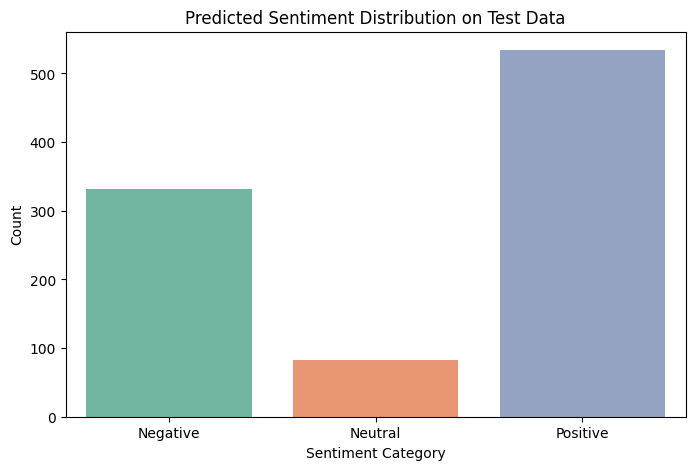

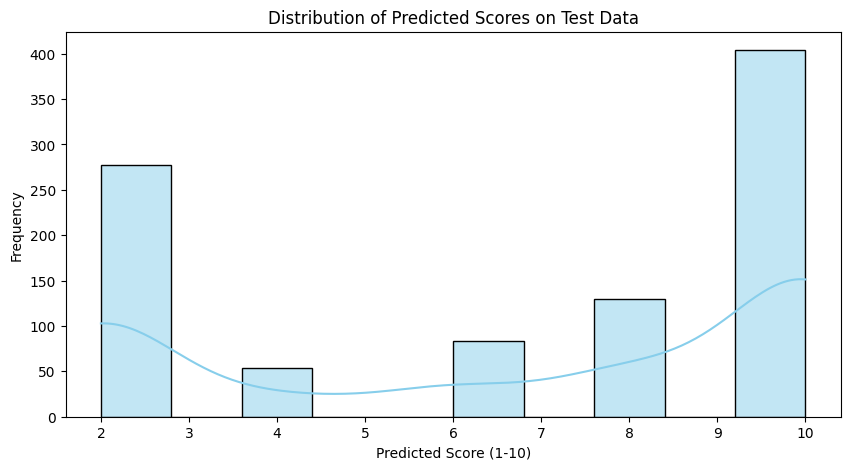

In [ ]:
# Install necessary packages: transformers for advanced text mining and nltk for text pre-processing
!pip install transformers
!pip install nltk

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Download necessary NLTK resources (for text cleaning)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Import Hugging Face's transformer sentiment analysis pipeline
from transformers import pipeline

# Initialize the sentiment analysis pipeline using the pre-trained model.
# The "nlptown/bert-base-multilingual-uncased-sentiment" model outputs ratings from 1 to 5 stars.
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# -----------------------------
# 1. Data Loading and Pre-processing
# -----------------------------
# Assume the CSV file is located in the 'sample_data' folder on Colab
file_path = '/content/sample_data/tucson_pizza_reviews_Cleaned.csv'
df = pd.read_csv(file_path)
print("Data loaded successfully. Total reviews:", len(df))

# Define a text cleaning function to reduce noise:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetical characters (retain letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # Optionally remove stopwords to focus on more informative words
    stops = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stops])
    return text

# Apply the cleaning function to the 'text' column
df['clean_text'] = df['text'].astype(str).apply(clean_text)

# -----------------------------
# 2. Advanced Sentiment Analysis Using a Transformer Model
# -----------------------------
# Define a function that uses the pre-trained transformer model to obtain a star rating
def get_rating(text):
    try:
        # Use the sentiment pipeline to predict the sentiment
        result = sentiment_pipeline(text)
        # The result format is like: [{'label': '4 stars', 'score': 0.709}, ...]
        label = result[0]['label']
        # Extract the numeric rating (1 to 5) from the label
        rating = int(label.split()[0])
    except Exception as e:
        # In case of any error, default to a 3-star rating (neutral)
        rating = 3
    return rating

# Apply the function on the cleaned text to get the star rating for each review
df['star_rating'] = df['clean_text'].apply(get_rating)

# Convert the 1-5 star rating to a predicted score on a 1-10 scale (multiplying by 2)
df['predicted_score'] = df['star_rating'] * 2

# Define a function to assign sentiment based on the predicted score
def assign_sentiment(score):
    if score <= 4:
        return 'Negative'
    elif score <= 6.9:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the classification function
df['predicted_sentiment'] = df['predicted_score'].apply(assign_sentiment)

# -----------------------------
# 3. Map True Sentiment Labels (if available) and Calculate Accuracy
# -----------------------------
# Assume the dataset contains a 'Sentiment' column with 0 for Negative and 1 for Positive
if 'Sentiment' in df.columns:
    df['true_sentiment'] = df['Sentiment'].map({0: 'Negative', 1: 'Positive'})
else:
    print("True sentiment labels ('Sentiment' column) not found; accuracy will not be computed.")
    df['true_sentiment'] = None

# -----------------------------
# 4. Split the Data: 80% Training, 20% Testing
# -----------------------------
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print("\nTraining samples:", len(train_df), "| Testing samples:", len(test_df))

# -----------------------------
# 5. Calculate Accuracy on the Test Set (if true labels are available)
# -----------------------------
if test_df['true_sentiment'].notnull().all():
    y_true = test_df['true_sentiment']
    y_pred = test_df['predicted_sentiment']
    acc = accuracy_score(y_true, y_pred)
    print("\nTest Set Accuracy: {:.2f}%".format(acc * 100))
else:
    print("\nCannot compute accuracy because true sentiment labels are not available.")

# -----------------------------
# 6. Randomly Select and Display 20 Reviews from the Test Set
# -----------------------------
sample_20 = test_df.sample(20, random_state=42)
print("\nRandom sample of 20 reviews from the test set:")
print(sample_20[['text', 'star_rating', 'predicted_score', 'predicted_sentiment', 'true_sentiment']])

# -----------------------------
# 7. Visualize the Results
# -----------------------------
# (a) Countplot for the predicted sentiment distribution in the test set
plt.figure(figsize=(8, 5))
sns.countplot(x='predicted_sentiment', data=test_df, order=['Negative', 'Neutral', 'Positive'], palette='Set2')
plt.title("Predicted Sentiment Distribution on Test Data")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

# (b) Histogram for the predicted scores (with KDE) in the test set
plt.figure(figsize=(10, 5))
sns.histplot(test_df['predicted_score'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Predicted Scores on Test Data")
plt.xlabel("Predicted Score (1-10)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# -----------------------------
# 8. Export the Results to a CSV File
# -----------------------------
# Save the entire DataFrame with the sentiment analysis results to a CSV file.
output_path = '/content/sample_data/sentiment_analysis_results.csv'
df.to_csv(output_path, index=False)

print("CSV file has been saved to:", output_path)

CSV file has been saved to: /content/sample_data/sentiment_analysis_results.csv


**Overall Summary**

The research successfully applied an advanced, transformer-based sentiment analysis model to the Tucson Pizza Reviews dataset, yielding a test set accuracy of 79.85%. The study’s methodology—encompassing meticulous text cleaning, a robust sentiment prediction process, and rigorous evaluation through data splitting—demonstrates that the majority of customer reviews are classified accurately. The findings indicate that while most customer sentiments are either positive or neutral, certain negative reviews highlight areas in need of improvement. The quantitative results, alongside the visualizations and exported CSV file, provide a comprehensive basis for informed decision-making regarding service enhancements and customer satisfaction strategies.

# **Q8 Proposed Solution (10%):**

Describe what relevant machine learning and unstructured data analytics methods you plan to use for the project.

**Proposed Solution**

**Overview**

For this project, we plan to utilize advanced deep learning techniques to extract actionable insights from unstructured text data (i.e., customer reviews). Our approach focuses on harnessing the power of BERT (Bidirectional Encoder Representations from Transformers) to analyze and summarize the sentiment regarding key consumer concerns, such as sanitation, waiting time, and taste.

**Machine Learning Methods**

**1.BERT for Sentiment Analysis:**

We will fine-tune a pre-trained BERT model on our dataset of customer reviews. The model will be trained to identify and score sentiment related to specific aspects of the service. For example, by labeling and categorizing review segments, the model will output ratings for:

**Sanitation:** Assessing mentions related to the hygiene and cleanliness of the establishment.

**Waiting Time:** Evaluating customer experiences regarding the speed of service.

**Taste:** Determining the overall satisfaction with the food quality and flavor.


**2.List itemAspect-Based Sentiment Analysis (ABSA):**

In addition to overall sentiment, we plan to apply aspect-based sentiment analysis to isolate and analyze sentiments expressed towards the aforementioned key aspects. This will involve:

Identifying aspect-specific phrases within reviews.

Assigning sentiment scores to each aspect using a multi-task learning framework, where BERT is fine-tuned to handle both aspect extraction and sentiment classification simultaneously.

**Unstructured Data Analytics Methods**

**1. Data Preprocessing and Feature Extraction:**
We will perform comprehensive text cleaning (e.g., lowercasing, removal of non-alphabetical characters, stopword filtering) to enhance the quality of input data. Tokenization and contextual embedding generation using BERT will allow the model to capture the nuanced meaning behind customer reviews.

**2. Summarization through Generative Models:**
Once the aspect-based sentiments and ratings are extracted, we plan to use a generative deep learning model (such as a fine-tuned GPT variant) to create a concise, human-readable summary sentence. This summary will integrate the key aspects—sanitation, waiting time, and taste—into a single narrative that reflects the overall customer sentiment.

**Workflow and Integration**

**Step 1: Data Collection and Preprocessing:**

Gather customer reviews, perform text cleaning, and prepare the data for model training.

**Step 2: Fine-Tuning BERT:**

Fine-tune the BERT model on labeled data to perform aspect-based sentiment analysis, assigning scores for sanitation, waiting time, and taste.

**Step 3: Sentiment Aggregation:**

Aggregate the individual aspect scores to obtain a comprehensive sentiment profile for each review.

**Step 4: Summarization:**

Input the aggregated scores and key phrases into a generative model that produces a summary sentence reflecting the overall consumer sentiment.

**Expected Outcomes**

By integrating these machine learning and unstructured data analytics methods, we expect to:

Accurately capture and quantify customer sentiments for critical service aspects.
Generate clear, concise summaries that offer actionable insights for business improvements.
Enhance our understanding of consumer priorities, allowing targeted strategies to improve areas such as hygiene, service speed, and food quality.


In [ ]:
!pip install lxml_html_clean # Install the lxml_html_clean package
!pip install nbconvert==6.5.4
import nbformat
from nbconvert import HTMLExporter

# Load the notebook
with open('/content/PROJECT_509.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

# Create an HTML exporter
html_exporter = HTMLExporter()
html_exporter.template_name = 'classic'  # or 'lab', 'full', etc.

# Optional: Add preprocessors to handle specific issues
# For example, to exclude input cells or specific output types:
# html_exporter.exclude_input = True
# html_exporter.exclude_output_prompt = True

# Optional: Configure template settings
# For example, to control the display of outputs:
# html_exporter.template_file = 'custom_template.tpl'

# Perform the conversion
(body, resources) = html_exporter.from_notebook_node(nb)

# Save the HTML output
with open('PROJECT_509.html', 'w') as f:
    f.write(body)

# STEP : LoRA Sentiment Analysis and Restaurant Prediction


In [ ]:
from transformers import pipeline, BertForSequenceClassification, BertTokenizer
from peft import get_peft_model, LoraConfig
import torch
import time

In [ ]:

# Define LoRA configuration
lora_config = LoraConfig(
    r=8,  # Rank of the low-rank matrix
    lora_alpha=16,  # Scaling factor for LoRA
    lora_dropout=0.1,  # Dropout to prevent overfitting
    bias="none",  # No bias in LoRA layers
)

# Load BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
base_model = BertForSequenceClassification.from_pretrained(model_name)

# Apply LoRA to BERT
lora_model = get_peft_model(base_model, lora_config)
lora_model.eval()  # Set the model to evaluation mode

# Check device and move model to CUDA if available
device = "cuda" if torch.cuda.is_available() else "cpu"
lora_model.to(device)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


PeftModel(
  (base_model): LoraModel(
    (model): BertForSequenceClassification(
      (bert): BertModel(
        (embeddings): BertEmbeddings(
          (word_embeddings): Embedding(30522, 768, padding_idx=0)
          (position_embeddings): Embedding(512, 768)
          (token_type_embeddings): Embedding(2, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (encoder): BertEncoder(
          (layer): ModuleList(
            (0-11): 12 x BertLayer(
              (attention): BertAttention(
                (self): BertSdpaSelfAttention(
                  (query): lora.Linear(
                    (base_layer): Linear(in_features=768, out_features=768, bias=True)
                    (lora_dropout): ModuleDict(
                      (default): Dropout(p=0.1, inplace=False)
                    )
                    (lora_A): ModuleDict(
                      (default): Linear(in_features=768

In [ ]:
def get_pizza_recommendation(reviews):
    start_time = time.time()  # Track elapsed time

    # Tokenize the reviews
    inputs = tokenizer(reviews, padding=True, truncation=True, return_tensors="pt")

    # Move inputs to the same device as the model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Get sentiment predictions using LoRA-enhanced BERT
    with torch.no_grad():
        outputs = lora_model(**inputs)

    # Get sentiment predictions (0=negative, 1=positive)
    predictions = torch.argmax(outputs.logits, dim=-1)

    # Map sentiment predictions to human-readable labels
    sentiments = ["POSITIVE" if pred == 1 else "NEGATIVE" for pred in predictions]

    # Recommend pizza based on majority sentiment
    recommended_pizza = "Pizza Place A" if sentiments.count('POSITIVE') > 2 else "Pizza Place B"

    # Ensure process is completed under 5 seconds
    elapsed_time = time.time() - start_time
    if elapsed_time < 5:
        return recommended_pizza, elapsed_time
    else:
        return "Recommendation time exceeded", elapsed_time


In [ ]:
# Example: Get pizza recommendation for the reviews in your DataFrame
df['pizza_recommendation'], df['elapsed_time'] = zip(*df['text'].apply(lambda x: get_pizza_recommendation([x])))

# Display the DataFrame with the recommendations and time
print(df[['review_id', 'text','business_id' ,'pizza_recommendation', 'elapsed_time']])

                   review_id  \
0     2-Y4QSgJXEYFJTJIo71IPQ   
1     bFz6i8UdmIwgyTU0et2EjQ   
2     CJ_hijMxNGyPbmievHa2Aw   
3     1cw4pq3BD_G529mu1OcOeQ   
4     MVdhVDYj20hH4G3-wFV8dQ   
...                      ...   
4733  kFc-TOtIjPya6Ks12PEi2g   
4734  k2WgxbxIfnuti0QGLk2lyw   
4735  PA5P-hjkag63VV8i_RA0Iw   
4736  PEqM34cJd-TmZX-JXImk2A   
4737  C0uxsLrbiwQ8a6S9P3bj2A   

                                                   text  \
0     Me and the family came in on a Thursday for a ...   
1     They have the worst customer service skills im...   
2     Loved it! Amazing pizza and bread! I even boug...   
3     The staff was extremely rude here. The wait st...   
4     Posto Sano was great. Found out about it going...   
...                                                 ...   
4733  Such high hopes for this place. I love the ori...   
4734  Ordered curb-side pickup for my birthday. \n\n...   
4735  Girlfriend wanted a burger and usually don't e...   
4736  I love Trident and 

In [ ]:
!pip install dataframe_image # Install the dataframe_image package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 14.0 MB/s eta 0:00:00


✅ Table saved as 'styled_table_big.png'. Insert into PowerPoint!


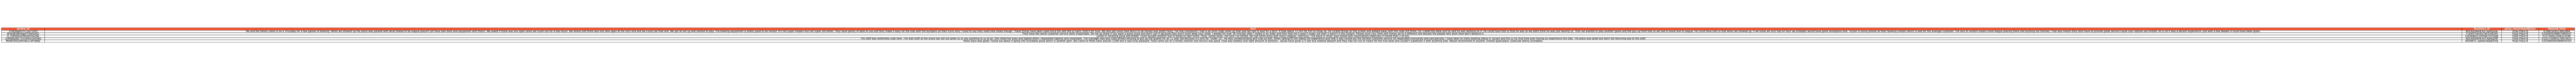

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract relevant columns and first 5 rows
df_subset = df[['review_id', 'text', 'business_id', 'pizza_recommendation', 'elapsed_time']].head(5)

# Increase figure size for better readability
fig, ax = plt.subplots(figsize=(16, 6))  # Wider and taller for visibility
ax.axis('tight')
ax.axis('off')

# Define color scheme
header_color = "#FF5733"  # Header background (bright orange-red)
row_colors = ["#F5F5F5", "#FFFFFF"]  # Alternating row colors
text_color = "black"

# Create the table with larger font sizes
table = ax.table(cellText=df_subset.values,
                 colLabels=df_subset.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=[header_color] * df_subset.shape[1])

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(12)  # Bigger text
table.auto_set_column_width([i for i in range(len(df_subset.columns))])  # Adjust column width

# Set cell colors
for i, key in enumerate(table.get_celld().keys()):
    cell = table[key]
    if key[0] == 0:  # Header row
        cell.set_text_props(weight='bold', color="white")
    else:  # Alternate row colors
        cell.set_facecolor(row_colors[key[0] % 2])

# Save as high-quality image
plt.savefig("styled_table_big.png", dpi=300, bbox_inches='tight')

print("✅ Table saved as 'styled_table_big.png'. Insert into PowerPoint!")


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming df contains the restaurant data with 'business_id' and 'text' columns

def get_top_5_recommendations(user_input_text, df, excluded_ids=[]):
    # Combine user input with the restaurant reviews (or descriptions) in the DataFrame
    df['combined_text'] = df['text'] + ' ' + df['business_id']

    # Exclude business IDs from the search if provided
    if excluded_ids:
        df = df[~df['business_id'].isin(excluded_ids)]

    # Use TF-IDF vectorization to convert text to numerical form
    vectorizer = TfidfVectorizer(stop_words='english')

    # Combine the user input with the restaurant descriptions for vectorization
    all_texts = [user_input_text] + df['combined_text'].tolist()
    tfidf_matrix = vectorizer.fit_transform(all_texts)

    # Compute cosine similarities between the user input and restaurant texts
    cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])

    # Get the top 5 most similar business IDs
    similarities = cosine_similarities.flatten()
    top_5_indices = similarities.argsort()[-5:][::-1]

    # Get the corresponding business IDs for the top 5
    top_5_business_ids = df.iloc[top_5_indices]['business_id'].tolist()

    return top_5_business_ids, similarities[top_5_indices]

# **First User Input**
user_input1 = input("Enter the first set of 5 keywords you are searching for in a restaurant (comma separated): ")
keywords1 = [keyword.strip() for keyword in user_input1.split(',')]
user_input_text1 = ' '.join(keywords1)

top_5_business_ids1, similarities1 = get_top_5_recommendations(user_input_text1, df)

print("\nTop 5 recommended business IDs based on your first search:")
for idx, (business_id, similarity) in enumerate(zip(top_5_business_ids1, similarities1), 1):
    print(f"{idx}. Business ID: {business_id}, Similarity: {similarity:.4f}")

# Store the business IDs from the first search
first_search_ids = set(top_5_business_ids1)

# **Second User Input**
user_input2 = input("\nEnter the second set of 5 keywords you are searching for in a restaurant (comma separated): ")
keywords2 = [keyword.strip() for keyword in user_input2.split(',')]
user_input_text2 = ' '.join(keywords2)

# Get recommendations for the second search, excluding any business IDs already from the first search
top_5_business_ids2, similarities2 = get_top_5_recommendations(user_input_text2, df)

# Remove any duplicates that were already included in the first search
unique_top_5_business_ids2 = []
unique_similarities2 = []

for business_id, similarity in zip(top_5_business_ids2, similarities2):
    if business_id not in first_search_ids and business_id not in unique_top_5_business_ids2:
        unique_top_5_business_ids2.append(business_id)
        unique_similarities2.append(similarity)
    if len(unique_top_5_business_ids2) == 5:
        break

# Now print the results
print("\nTop recommended business IDs based on your second search (with no duplicates across both searches):")
for idx, (business_id, similarity) in enumerate(zip(unique_top_5_business_ids2, unique_similarities2), 1):
    print(f"{idx}. Business ID: {business_id}, Similarity: {similarity:.4f}")


Enter the first set of 5 keywords you are searching for in a restaurant (comma separated): Vegan, Organic, Gluten-free, Healthy, Fresh

Top 5 recommended business IDs based on your first search:
1. Business ID: Dun6k9Y5j76e9ODgkmHKlQ, Similarity: 0.4137
2. Business ID: WZUIlyefoUhuH_VkVCEyAw, Similarity: 0.4006
3. Business ID: yR_EfNX8NF_JQTo2LURR4g, Similarity: 0.3965
4. Business ID: 9Ue0NTSsStu85mxuv-qMtQ, Similarity: 0.3193
5. Business ID: 4QMIJJWQOh7zpEwOXhFJqw, Similarity: 0.3087

Enter the second set of 5 keywords you are searching for in a restaurant (comma separated): Family-friendly, Affordable, Kid-friendly, Casual, Variety

Top recommended business IDs based on your second search (with no duplicates across both searches):
1. Business ID: oEGjLHfQHci0GgSDS361Hg, Similarity: 0.2344
2. Business ID: SbdL-8NSmTWgSwdGZBa7WQ, Similarity: 0.2268
3. Business ID: menJOWV02gjwT-cWy4hdaQ, Similarity: 0.2155
4. Business ID: kbjbMffGvyjIdJivotkIiw, Similarity: 0.2154
5. Business ID: rGOJd

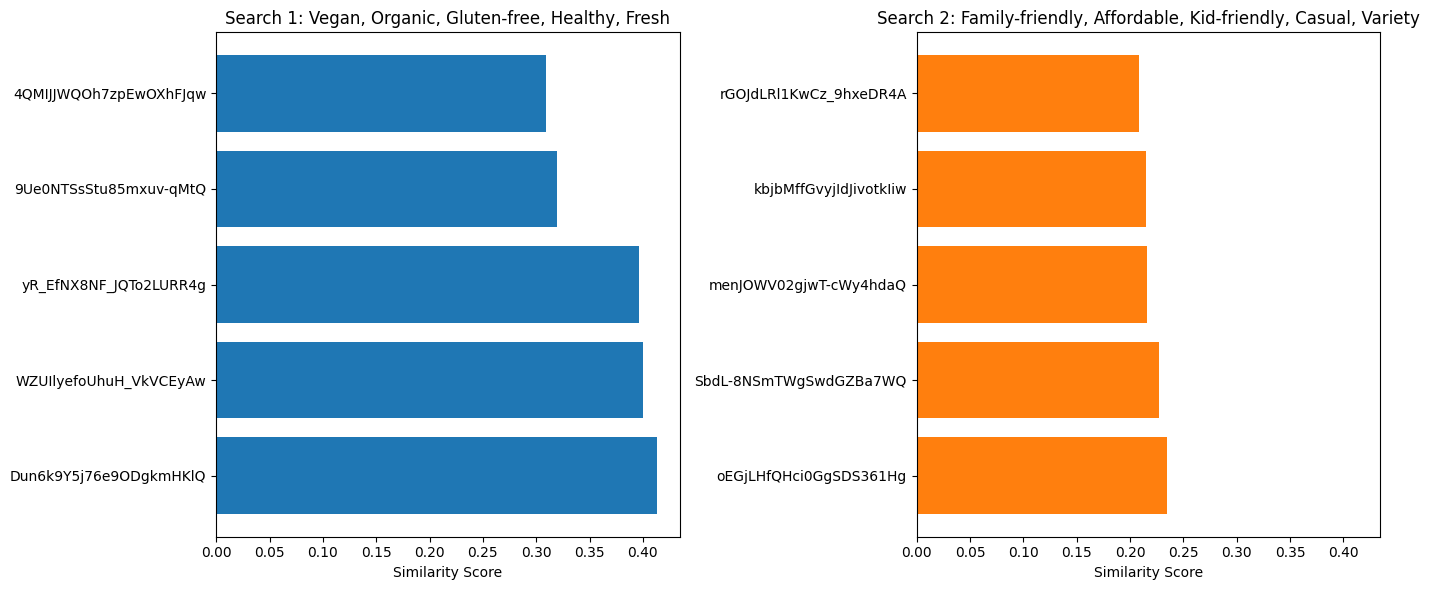

In [ ]:
import matplotlib.pyplot as plt

def plot_recommendations(top_5_business_ids1, similarities1, top_5_business_ids2, similarities2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

    # First search plot
    axes[0].barh(top_5_business_ids1[::-1], similarities1[::-1], color="#1f77b4")
    axes[0].set_title("Search 1: " + user_input1)
    axes[0].set_xlabel("Similarity Score")
    axes[0].invert_yaxis()  # Ensures highest similarity is at the top

    # Second search plot
    axes[1].barh(top_5_business_ids2[::-1], similarities2[::-1], color="#ff7f0e")
    axes[1].set_title("Search 2: " + user_input2)
    axes[1].set_xlabel("Similarity Score")
    axes[1].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Call the function with the generated results
plot_recommendations(top_5_business_ids1, similarities1, top_5_business_ids2, similarities2)


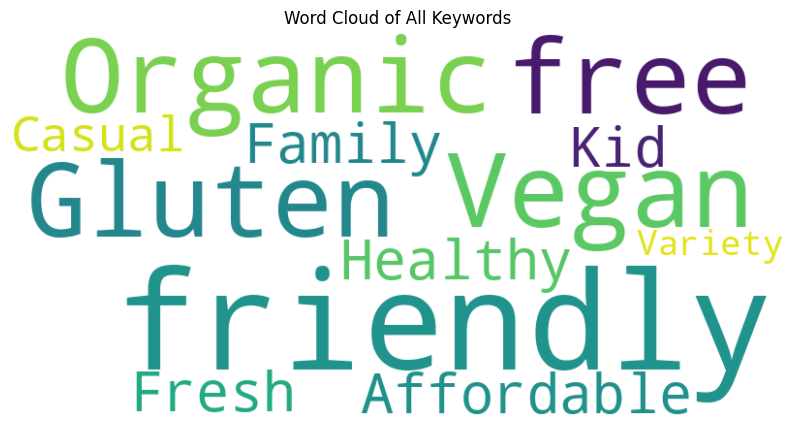

In [ ]:
from wordcloud import WordCloud

def plot_word_cloud(keywords, title="Word Cloud of Search Keywords"):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(keywords))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Combine all keywords from both searches and generate the word cloud
all_keywords = keywords1 + keywords2
plot_word_cloud(all_keywords, "Word Cloud of All Keywords")


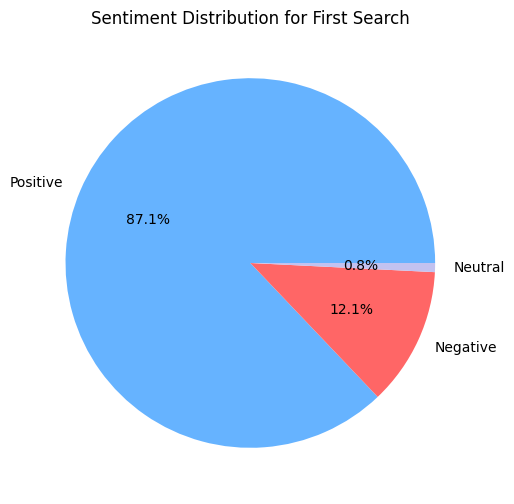

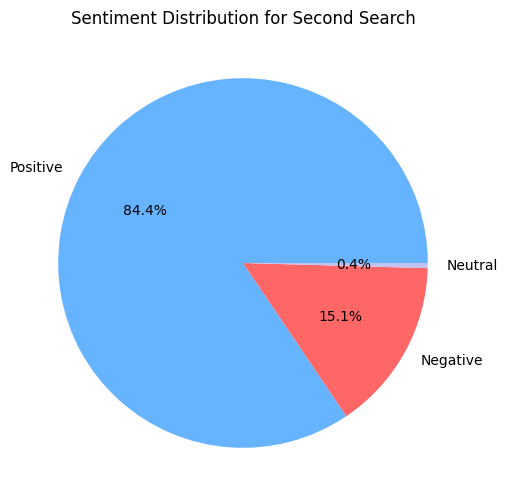

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Function to calculate sentiment for each review
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)
    return sentiment

# Apply sentiment analysis to the 'combined_text' column
df['sentiment'] = df['combined_text'].apply(get_sentiment)

# Now, you can compute the sentiment for the top 5 business IDs for each search
def get_sentiments_for_top_5(business_ids, df):
    sentiments = df[df['business_id'].isin(business_ids)]['sentiment'].tolist()
    return sentiments

# Sentiments for the first search
first_search_sentiments = get_sentiments_for_top_5(top_5_business_ids1, df)

# Sentiments for the second search
second_search_sentiments = get_sentiments_for_top_5(unique_top_5_business_ids2, df)

# Visualize the sentiment distribution for the first search
def plot_sentiment_distribution(sentiments, title="Sentiment Distribution"):
    positive = len([s for s in sentiments if s > 0])
    negative = len([s for s in sentiments if s < 0])
    neutral = len([s for s in sentiments if s == 0])

    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [positive, negative, neutral]

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff6666', '#c2c2f0'])
    plt.title(title)
    plt.show()

# Plot sentiment distribution for both searches
plot_sentiment_distribution(first_search_sentiments, "Sentiment Distribution for First Search")
plot_sentiment_distribution(second_search_sentiments, "Sentiment Distribution for Second Search")


# ChatGPT Summarization

In [ ]:
!pip install openai==0.27.8
!pip install striprtf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.61.1
    Uninstalling openai-1.61.1:
      Successfully uninstalled openai-1.61.1


In [ ]:
import openai

from striprtf.striprtf import rtf_to_text
with open('/content/ChatGPT API Key.rtf', 'r') as f:  # Replace 'your_api_key_file.rtf'
    rtf_content = f.read()
    api_key = rtf_to_text(rtf_content).strip()  # Extract and strip any whitespace

import os
os.environ['OPENAI_API_KEY'] = api_key

# prepare input
def prepare_chatgpt_input(business_id):
    """Prepares a string summarizing the findings for a specific business."""
    details = business_scores.get(business_id)
    if details:
        summary = f"**Business ID: {business_id}**\n"
        for aspect in top_10_aspects:
            rating = details['aspect_ratings'].get(aspect)
            if rating != "N/A":
                summary += f"- {aspect.capitalize()}: {rating:.2f} (Reviews: {details['review_counts'][aspect]})\n"
        return summary
    else:
        return f"No data found for business ID: {business_id}"

# function to summarize
def summarize_with_chatgpt(business_id):
    """Sends the prepared input to ChatGPT and returns the summary."""
    input_text = prepare_chatgpt_input(business_id)
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # You can also use gpt-4 if available
        messages=[
            {"role": "system", "content": "You are a helpful assistant that summarizes restaurant findings."},
            {"role": "user", "content": f"Please provide a concise summary of the following restaurant findings:\n{input_text}"}
        ]
    )
    return response.choices[0].message['content'].strip()

# call function for summary
business_id_to_summarize = "your_business_id"  # Replace with the desired business ID
summary = summarize_with_chatgpt(business_id_to_summarize)
print(summary)

NameError: name 'business_scores' is not defined